Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**Activity NO. 7** | **Performing Face Recognition**
**Name** | Ballesteros, Angelo E.
**Section** | CPE32S3
**Date Performed**: | 2-19-2025
**Date Submitted**: | 2-21-2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

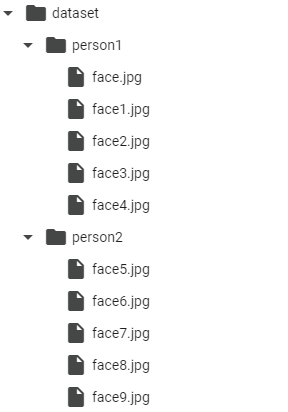

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [33]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=(200, 200)):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          im = cv2.resize(im, sz)

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [34]:
dataset_img = '/content/dataset'
[X, y] = read_images(dataset_img)

In [35]:
print("Number of images:", len(X))
print("Shape of each image:", X[0].shape)

Number of images: 10
Shape of each image: (200, 200)


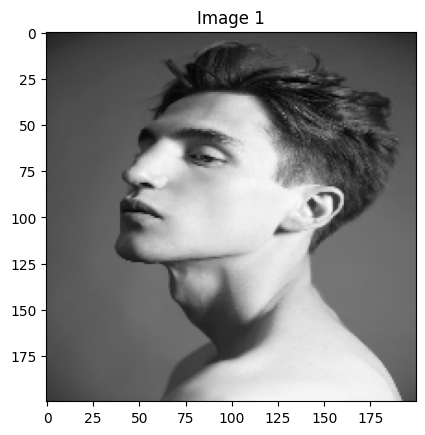

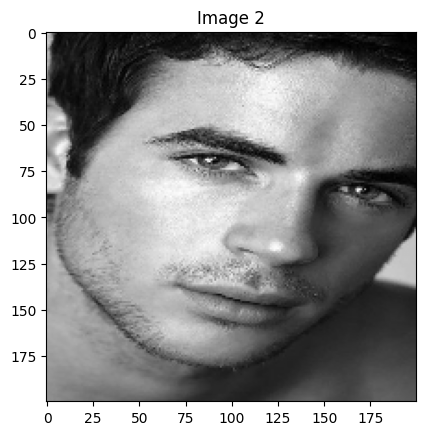

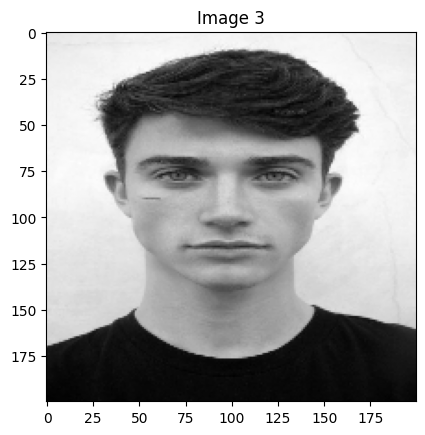

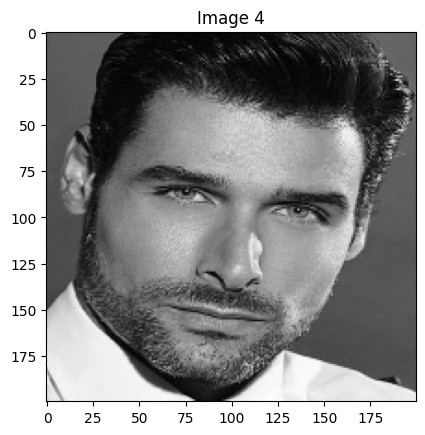

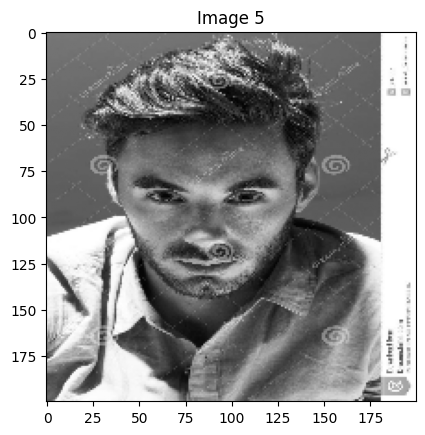

In [36]:
import matplotlib.pyplot as plt

display_img = 5
for i in range(display_img):
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.show()

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

---

**Answer: In this codeblock, I have encountered some problems such as specifying the path to my dataset,  reading and displaying the images which lead to errors.**

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [38]:
def face_rec():
  names = ['Friend1', 'Friend2'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(sys.argv[1])
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()

error: OpenCV(4.11.0) /io/opencv_contrib/modules/face/src/eigen_faces.cpp:62: error: (-5:Bad argument) Empty training data was given. You'll need more than one sample to learn a model. in function 'train'


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

**Answer: It appears that my dataset has been not reading since it displays "Empty training data was given."**

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

## 5. Summary, Conclusions and Lessons Learned

**In conclusion, I am having problems with this activity since I did not learn how to train image datasets. I'm experiencing errors such as empty training data and the camera not showing , even though it is enabled in my Google Colab. I was unable to complete the supplementary activity since the image dataset I created was not being trained and tested.**

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*